# Как предобработка img влияет на распознование вершин?

# Features openCV

## Object tracking

In [1]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):
    
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

## Geometric Transformations of Images

## Scaling

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('case1.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
# OR
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

cv.imshow('img', res)
cv.waitKey(0)
cv.destroyAllWindows()

## Translation

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('case1.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Rotation

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('case1.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## Affine Transformation

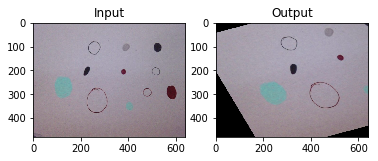

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('case1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation

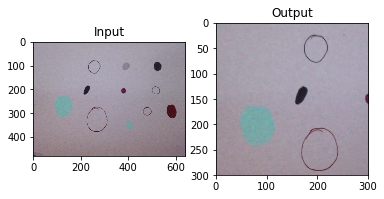

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('case1.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Image Thresholding

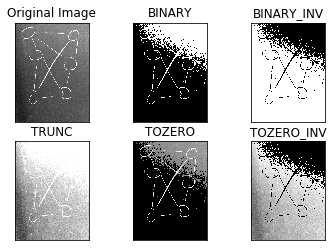

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./../data/Green/orig/IMG_3094.JPG',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    txt = './../result/' + str(i) + 'conv.png'
    plt.savefig(txt, format="PNG")
plt.show()

## Adaptive Thresholding

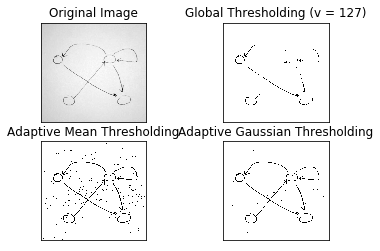

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('3.png',0)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.savefig('conv.png', format="PNG")
plt.show()

## Otsu’s Binarization
### Input image is a noisy image
### In first case, I applied global thresholding for a value of 127
### In second case, I applied Otsu’s thresholding directly
### In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding

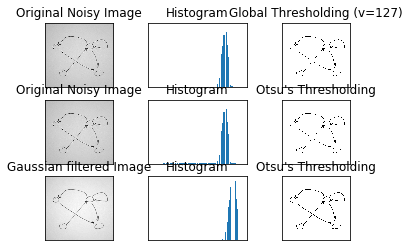

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('3.png',0)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Morphological Transformations

## Erosion

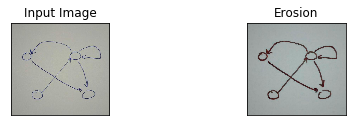

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('3.png')
# RGB
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

# visalusation
plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(erosion, 'gray')
plt.title("Erosion"), plt.xticks([]), plt.yticks([])
#plt.savefig('get.png')
plt.show()

### Dilation

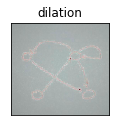

In [6]:
dilation = cv2.dilate(img, kernel, iterations = 1)

# visalusation
plt.subplot(133),plt.imshow(dilation, 'gray')
plt.title("dilation"), plt.xticks([]), plt.yticks([])
plt.show()

### Opening

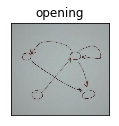

In [7]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# visalusation
plt.subplot(133),plt.imshow(opening, 'gray')
plt.title("opening"), plt.xticks([]), plt.yticks([])
plt.show()

### Closing

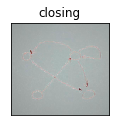

In [8]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# visalusation
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("closing"), plt.xticks([]), plt.yticks([])
plt.show()

### Morphological Gradient

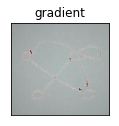

In [9]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# visalusation
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("gradient"), plt.xticks([]), plt.yticks([])
plt.show()

## Top Hat

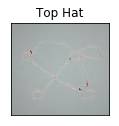

In [10]:
gradient = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# visalusation
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("Top Hat"), plt.xticks([]), plt.yticks([])
plt.show()

## Black Hat

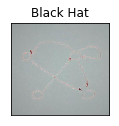

In [11]:
gradient = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# visalusation
plt.subplot(133),plt.imshow(closing, 'gray')
plt.title("Black Hat"), plt.xticks([]), plt.yticks([])
plt.show()